In [38]:
import numpy as np
import matplotlib.pyplot as plt
import HW3_utils_data as utils
from scipy.special import hermitenorm
from scipy.integrate import simpson
from scipy.stats import norm

In [39]:
P = 5       # Number of basis funcitons

basis = [hermitenorm(n) for n in range(P)]  # Basis functions

# Numerical Simulation

Text(0.5, 1.0, '1D Burgers Equation')

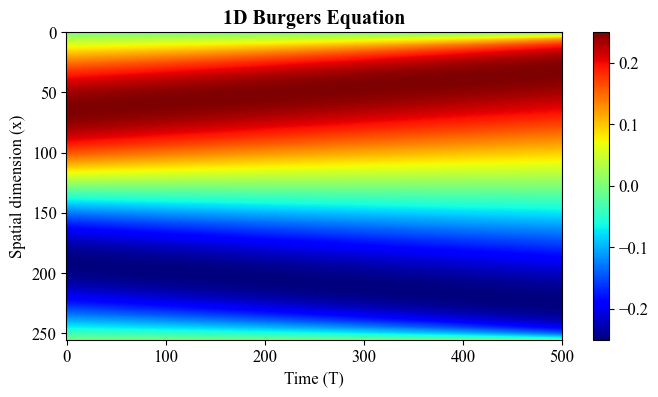

In [40]:
T = 0.5             # Total time of integration
dt = 0.001          # Time step
N = int(T/dt)       # No of time points
a = 1               # Length of space
J = 256             # Space discretization points
dx = a/J
x = np.arange(0,a,a/J)           # Discretization points
u0 = 0.25*np.sin(2*np.pi*x)      # Initial condition

ut, t = utils.pde_oned_Galerkin(u0, T, a, N, J, epsilon=0)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(ut, aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
plt.title('1D Burgers Equation', fontweight='bold')

# Intrusive PCE

In [41]:
w = np.linspace(-50,50,1000)       # range of omega values
U0 = np.zeros((P, J))

for i in range(P):
    for j in range(J):
        U0[i][j] = simpson(u0[j]*basis[i](w), w)

In [43]:
trip_prod = np.zeros((P,P,P))      # triple product of basis functions
Ut = np.zeros((P, J, N+1))
Ut[:,:,0] = U0

for time in range(N):
    for k in range(P):
        for i in range(P):
            for j in range(P):
                trip_prod[i][j][k] = simpson(basis[i](w)*basis[j](w)*basis[k](w)*norm.pdf(w), w)
                Ut[k, 0, time+1] = Ut[k, 0, time] - dt*trip_prod[i,j,k]*Ut[j,0,time]*(-1.5*Ut[i,0,time] + 2*Ut[i,1,time] - Ut[i,2,time]*0.5)/dx
                for idx in range(1,J-1):
                    Ut[k,idx,time+1] = Ut[k,idx,time] - dt*trip_prod[i,j,k]*Ut[j,idx,time]*(Ut[i,idx+1,time] - Ut[i,idx-1,time])/(2*dx)
                Ut[k,J-1,time+1] = Ut[k,0,time+1]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11340\1593896307.py:12: RuntimeWarning: overflow encountered in scalar multiply
  Ut[k,idx,time+1] = Ut[k,idx,time] - dt*trip_prod[i,j,k]*Ut[j,idx,time]*(Ut[i,idx+1,time] - Ut[i,idx-1,time])/(2*dx)


In [44]:
w = np.linspace(-50,50,1000)

u_xtw = np.zeros((J, N+1, w.shape[0]))
for i in range(len(w)):
    for k in range(P):
        u_xtw[:, :, i] += Ut[k, :, :]*basis[k](w[i])

In [45]:
 mean = np.zeros((J, N+1))

for i in range(J):
    for j in range(N+1):
        mean[i, j] = simpson(u_xtw[i,j,:]*norm.pdf(w), w)

Text(0.5, 1.0, '1D Burgers Equation using Non-instrusive PCE (Mean)')

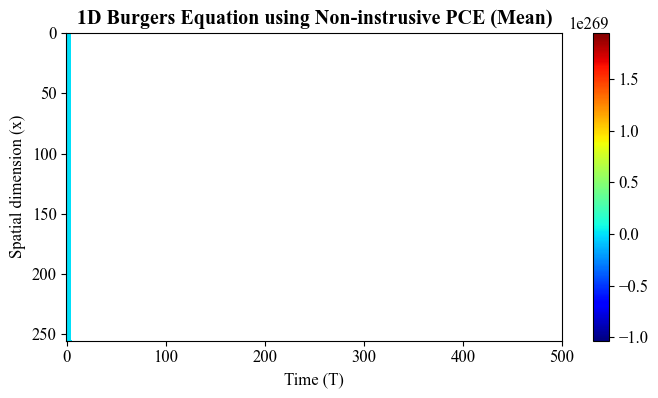

In [46]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(mean, aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
plt.title('1D Burgers Equation using Non-instrusive PCE (Mean)', fontweight='bold')

In [47]:
var = np.zeros((J, N+1))

integrand = np.zeros((J, N+1, len(w)))
for k in range(len(w)):
    integrand[:,:,k] = (u_xtw[:,:,k] - mean)**2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11340\2385399184.py:5: RuntimeWarning: overflow encountered in square
  integrand[:,:,k] = (u_xtw[:,:,k] - mean)**2


In [48]:
for i in range(J):
    for j in range(N+1):
        var[i, j] = simpson(integrand[i,j,:]*norm.pdf(w), w)

Text(0.5, 1.0, '1D Burgers Equation using Non-instrusive PCE (Std. Dev.)')

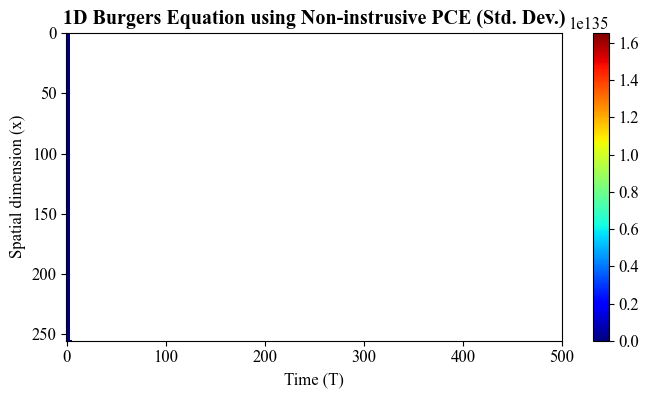

In [49]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(np.sqrt(var), aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
plt.title('1D Burgers Equation using Non-instrusive PCE (Std. Dev.)', fontweight='bold')

# Non-intrusive PCE

In [52]:
np.random.seed(42)

num_samples = 1000
samples = np.random.randn(num_samples)

PHI = np.zeros((num_samples, P))
for i in range(P):
    PHI[:, i] = basis[i](samples)

array([[ 1.        ,  0.49671415, -0.75327505, -1.36759068,  1.5805235 ],
       [ 1.        , -0.1382643 , -0.98088298,  0.4121497 ,  2.88566336],
       [ 1.        ,  0.64768854, -0.58049956, -1.67135999,  0.65897797],
       ...,
       [ 1.        ,  0.64084286, -0.58932043, -1.65934751,  0.70458027],
       [ 1.        , -0.57117899, -0.67375456,  1.52719243,  1.14896346],
       [ 1.        ,  0.57258278, -0.67214896, -1.53002648,  1.14038006]])

In [53]:
Ut = np.zeros((P, J, N+1))

for x in range(J):
    for time in range(N+1):
        
        y = ut[x,time]*np.ones(num_samples)
        
        Ut[:,x,time] = np.linalg.inv(PHI.T@PHI)@(PHI.T@y)

In [54]:
w = np.linspace(-50,50,1000)

u_xtw = np.zeros((J, N+1, w.shape[0]))
for i in range(len(w)):
    for k in range(P):
        u_xtw[:, :, i] += Ut[k, :, :]*basis[k](w[i])

In [55]:
mean = np.zeros((J, N+1))

for i in range(J):
    for j in range(N+1):
        mean[i, j] = simpson(u_xtw[i,j,:]*norm.pdf(w), w)

Text(0.5, 1.0, '1D Burgers Equation using Non-instrusive PCE (Mean)')

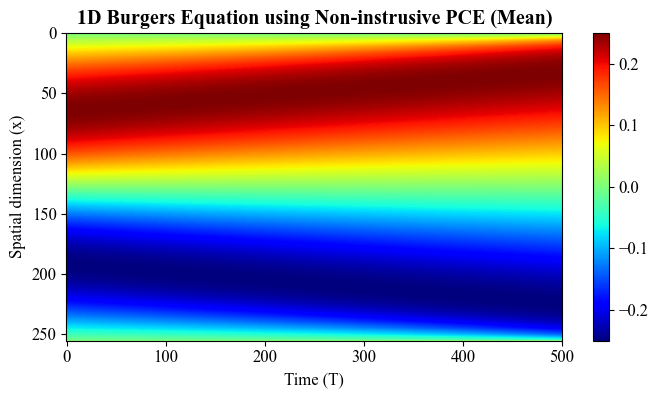

In [56]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(mean, aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
plt.title('1D Burgers Equation using Non-instrusive PCE (Mean)', fontweight='bold')

In [57]:
var = np.zeros((J, N+1))

integrand = np.zeros((J, N+1, len(w)))
for k in range(len(w)):
    integrand[:,:,k] = (u_xtw[:,:,k] - mean)**2

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.65225126e-74, 2.61037723e-74, 2.56908939e-74, ...,
         2.24697720e-74, 2.28369208e-74, 2.32090123e-74],
        [1.76478017e-73, 1.73677738e-73, 1.70921210e-73, ...,
         1.57827121e-73, 1.60400521e-73, 1.63010953e-73],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.24261852e-64, 2.20713061e-64, 2.17213363e-64, ...,
         1.96706214e-64, 1.99916275e-64, 2.03169742e-64],
        [1.76295265e-63, 1.73488099e-63, 1.70722112e-63, ...,
         1.67763355e-63, 1.70488280e-63, 1.73252380e-63]],

       [[5.31272884e-26, 5.23841986e-26, 5.16510732e-26, ...,
         3.18107180e-28, 3.30382701e-28, 3.43083374e-28],
        [2.84190566e-25, 2.79834140e-25, 2.75536858e-25, ...,
         1.39868446e-25, 1.42245822e-25, 1.44659066e-25],
        [6.44868950e-26, 

In [58]:
for i in range(J):
    for j in range(N+1):
        var[i, j] = simpson(integrand[i,j,:]*norm.pdf(w), w)

In [59]:
var

array([[0.00000000e+00, 6.13148849e-85, 1.16711592e-85, ...,
        0.00000000e+00, 9.34483271e-75, 9.34154846e-76],
       [1.01222601e-35, 5.35388405e-36, 1.98759963e-36, ...,
        1.28053422e-34, 2.43192582e-35, 1.18096612e-34],
       [2.43188928e-35, 3.41886235e-35, 1.53949578e-35, ...,
        1.74112573e-34, 3.70374437e-34, 1.89582803e-34],
       ...,
       [1.25124758e-35, 5.71629262e-35, 1.74438121e-35, ...,
        4.88564203e-34, 5.56080740e-34, 1.57405699e-34],
       [2.59311044e-35, 3.19736460e-35, 7.13734653e-36, ...,
        6.38188896e-34, 1.10213903e-33, 4.59178487e-34],
       [0.00000000e+00, 6.13148849e-85, 1.16711592e-85, ...,
        0.00000000e+00, 9.34483271e-75, 9.34154846e-76]])

Text(0.5, 1.0, '1D Burgers Equation using Non-instrusive PCE (Std. Dev.)')

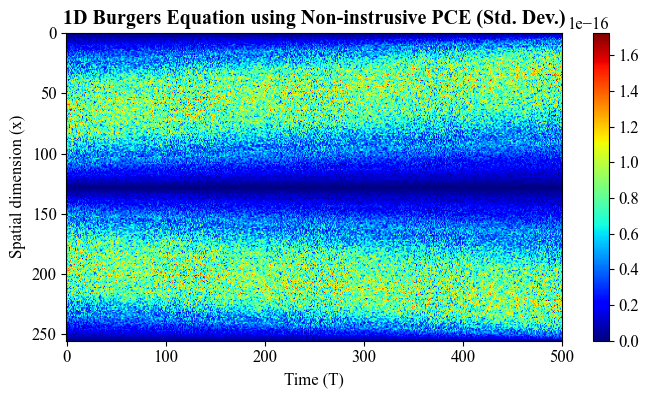

In [61]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(np.sqrt(var), aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
plt.title('1D Burgers Equation using Non-instrusive PCE (Std. Dev.)', fontweight='bold')